# Section C

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [2]:
warnings.filterwarnings("ignore")

In [ ]:
# Loading the dataset
data_train = pd.read_csv('Fashion-MNIST/fashion-mnist_train.csv')
data_test = pd.read_csv('Fashion-MNIST/fashion-mnist_test.csv')

In [4]:
df_train = data_train[:8000]
df_test = data_train[:2000]

In [5]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.shape

(8000, 785)

In [7]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test.shape

(2000, 785)

In [9]:
X_train_images = df_train.drop('label', axis=1)
y_train_labels = df_train['label']
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train_images, y_train_labels, test_size=0.1, random_state=42)

##### 1. Perform appropriate preprocessing on the data (for eg: normalization) and visualize any 10 samples from the test dataset.

In [11]:
# normalizing data
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [12]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7935,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.227451,...,0.054902,0.400000,0.145098,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4608,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.094118,0.329412,0.333333,0.121569,0.0,0.0,0.0
2939,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.007843,0.000000,...,0.062745,0.000000,0.360784,0.619608,0.596078,0.082353,0.000000,0.0,0.0,0.0
4336,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.007843,0.552941,0.749020,0.000000,0.000000,0.000000,0.0,0.0,0.0
3658,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


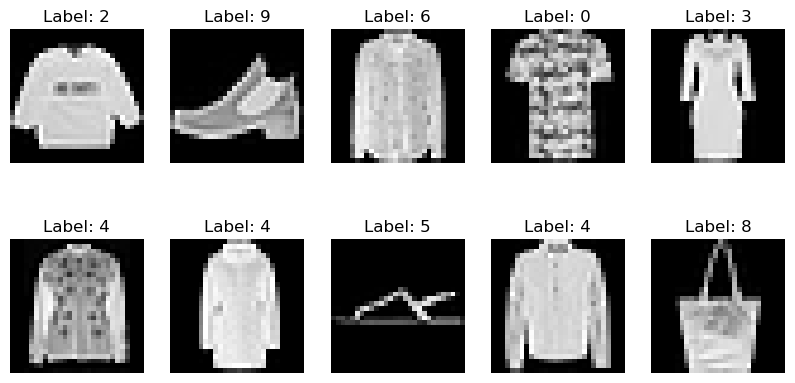

In [ ]:
# Plotting the first 10 images
plt.figure(figsize=(10, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    img = X_test.iloc[i].values.reshape(28, 28) # 28 x 28 = 784
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y_test.iloc[i]}")
    plt.axis('off')
plt.show()

##### 2. Train a MLP Classifier from sklearn’s neural network module on the training dataset. The network should have 3 layers of size [128, 64, 32], should be trained for 100 iterations using an ‘adam’ solver with a batch size of 128 and learning rate of 2e-3. Train it using all the 4 activation functions i.e. ‘logistic’, ‘tanh’, ‘relu’ and ‘identity’. For each activation function, plot the training loss vs epochs and validation loss vs epochs curves and comment on which activation function gave the best performance on the test set in the report.

In [14]:
hidden_layer_sizes = [128, 64, 32]
max_iter = 100
batch_size = 128
lr_rate = 2e-5

References:

- [Scikit Learn Documentation: MLP Classifier](https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
# Training function
def train_mlp(activation_layer):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, 
                        max_iter=1,
                        solver='adam', 
                        batch_size=batch_size, 
                        learning_rate_init=lr_rate, 
                        activation=activation_layer, 
                        warm_start=True,
                        random_state=42)
    
    train_loss = []
    val_loss = []
    
    for epoch in range(max_iter):
        mlp.fit(X_train, y_train)
        train_loss.append(mlp.loss_)
        
        # Calculate validation loss
        val_pred = mlp.predict_proba(X_val)
        val_loss_epoch = -np.mean([np.log(probs[y]) for probs, y in zip(val_pred, y_val)])
        val_loss.append(val_loss_epoch)
    print(f"Completed training with {activation_layer} activation.")
    return mlp, train_loss, val_loss

In [ ]:
# Plotting training vs validation vs epoch graph
def plot_losses(train_loss, val_loss, activation_layer):
    plt.plot(train_loss, label='train loss')
    plt.plot(val_loss, label='validation loss')
    plt.title(f'{activation_layer} activation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
# Testing accuracy
def test_accuracy(mlp):
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {acc * 100}%")

Logistic Activation Layer

In [18]:
logistic_mlp, logistic_train_loss, logistic_val_loss = train_mlp('logistic')

Completed training with logistic activation.


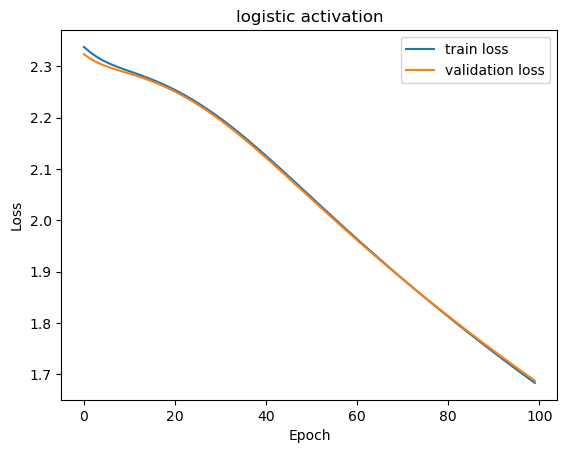

In [19]:
plot_losses(logistic_train_loss, logistic_val_loss, 'logistic')

In [20]:
test_accuracy(logistic_mlp)

Test accuracy: 44.0%


Tanh Activation Layer

In [21]:
tanh_mlp, tanh_train_loss, tanh_val_loss = train_mlp('tanh')

Completed training with tanh activation.


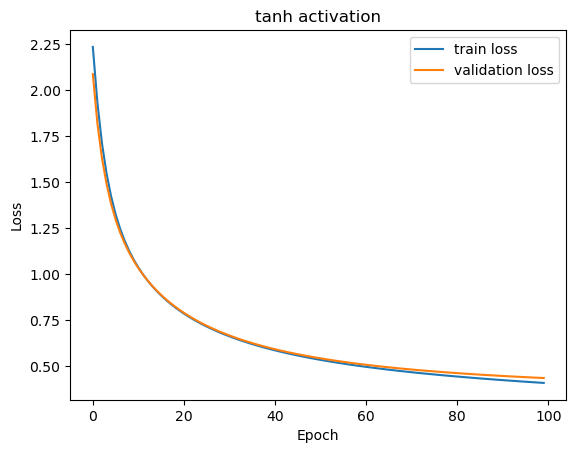

In [22]:
plot_losses(tanh_train_loss, tanh_val_loss, 'tanh')

In [23]:
test_accuracy(tanh_mlp)

Test accuracy: 86.35000000000001%


Relu Activation Layer

In [24]:
relu_mlp, relu_train_loss, relu_val_loss = train_mlp('relu')

Completed training with relu activation.


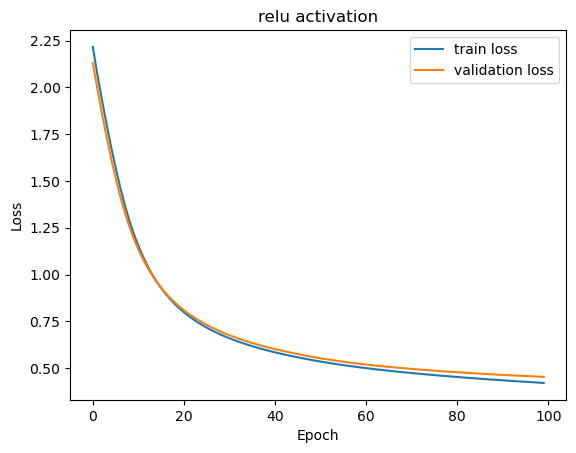

In [25]:
plot_losses(relu_train_loss, relu_val_loss, 'relu')

In [26]:
test_accuracy(relu_mlp)

Test accuracy: 85.95%


Identity Activation Layer

In [27]:
identity_mlp, identity_train_loss, identity_val_loss = train_mlp('identity')

Completed training with identity activation.


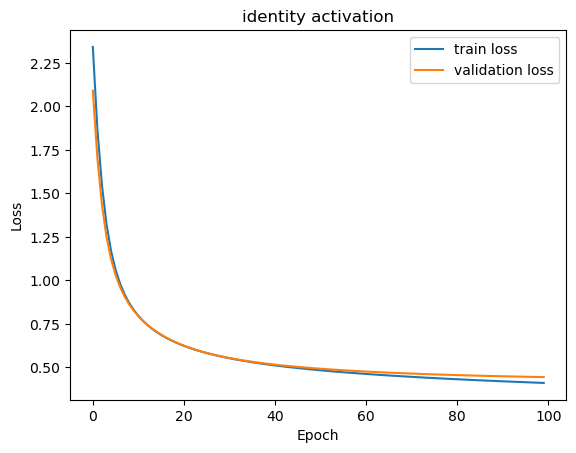

In [28]:
plot_losses(identity_train_loss, identity_val_loss, 'identity')

In [29]:
test_accuracy(identity_mlp)

Test accuracy: 86.1%


`tanh` is the activation function which gives the best result on the test set.

##### 3. Perform grid search using the best activation function from part 2 to find the best hyperparameters (eg: solver, learning rate, batch size) for the MLP classifier and report them in the report.

The best activation function from previous part is `tanh`.

In [12]:
param_grid = {
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [2e-5, 1e-5],
    'batch_size': [32, 128],
    'hidden_layer_sizes': [
        (128, 64, 32),
        (32, 16, 8)
    ]
}

In [13]:
mlp = MLPClassifier(activation='tanh', max_iter=100, random_state=42)

References:

- [Scikit Learn Documentation: GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [14]:
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=3, scoring='accuracy', verbose=2)

In [15]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='tanh', max_iter=100,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'batch_size': [32, 128],
                         'hidden_layer_sizes': [(128, 64, 32), (32, 16, 8)],
                         'learning_rate_init': [2e-05, 1e-05],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             scoring='accuracy', verbose=2)

In [16]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Report the results
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'batch_size': 32, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 2e-05, 'solver': 'adam'}
Best Cross-Validation Score: 0.8481944444444444


##### 4. For this part, you need to train a MLPRegressor from sklearn’s neural network module on a regeneration task:<br>a. This means you will need to design a 5 layer neural network with layer sizes following the format: [c, b, a, b, c] where c > b > a.<br>b. By regeneration task, it means that you will try to regenerate the input image using your designed neural network and plot the training and validation losses per epoch to see if your model is training correctly.<br>c. Train 2 neural networks on the task above. One using a ‘relu’ activation and the other using the ‘identity’ activation function. Set the solver as adam and use a constant learning rate of 2e-5.<br>d. Post training both the networks, visualize the generations for the 10 test samples you visualized in part 1 and describe your observations in the report.

In [12]:
layers = [128, 64, 32, 64, 128]

References:

- [Scikit Learn Documentation: MLP Regressor](https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [13]:
def regenerator(activation):
    mlp = MLPRegressor(hidden_layer_sizes=layers, 
                        max_iter=1,
                        solver='adam', 
                        learning_rate='constant',
                        learning_rate_init=2e-5, 
                        activation=activation, 
                        warm_start=True,
                        random_state=42)
    train_loss = []
    val_loss = []
    
    for epoch in range(100):
        mlp.fit(X_train, X_train)
        train_loss.append(mlp.loss_)        
        val_pred = mlp.predict(X_val)        
        val_loss_epoch = np.mean((val_pred - X_val) ** 2)
        val_loss.append(val_loss_epoch)
    
    print(f"Completed training with {activation} activation.")
    return mlp, train_loss, val_loss

In [14]:
def plot_losses(train_loss, val_loss, activation_layer):
    plt.plot(train_loss, label='train loss')
    plt.plot(val_loss, label='validation loss')
    plt.title(f'{activation_layer} activation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [15]:
def visualize(mlp):
    num_samples = 10
    predictions = mlp.predict(X_test[:num_samples])
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 20))
    for i in range(num_samples):
        axes[i, 0].imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
        axes[i, 0].set_title(f'Original Image ({y_test.iloc[i]})')
        axes[i, 0].axis('off')
        axes[i, 1].imshow(predictions[i].reshape(28, 28), cmap='gray')
        axes[i, 1].set_title(f'Reconstructed ({y_test.iloc[i]})')
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

In [16]:
relu_mlp, relu_train_loss, relu_val_loss = regenerator('relu')

Completed training with relu activation.


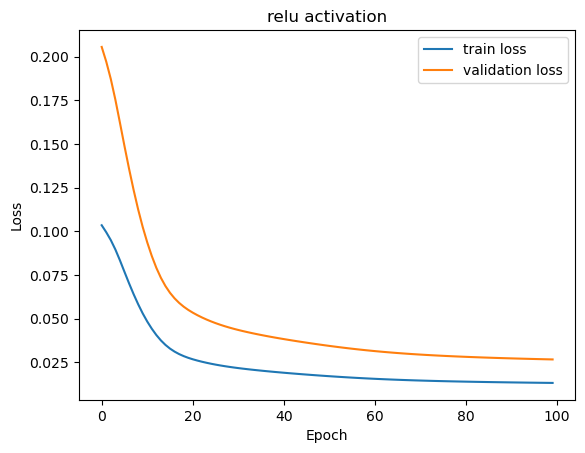

In [17]:
plot_losses(relu_train_loss, relu_val_loss, 'relu')

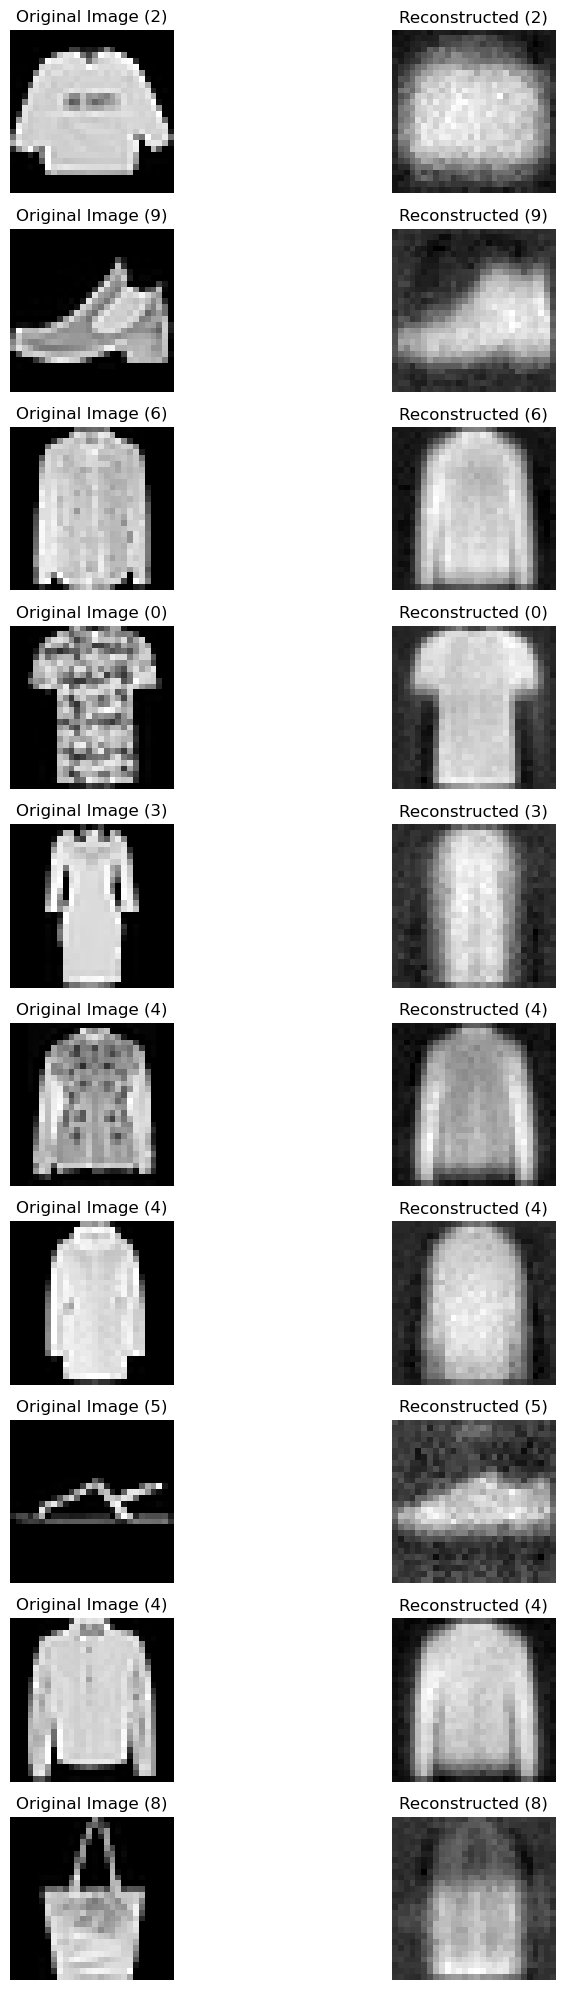

In [18]:
visualize(relu_mlp)

In [19]:
identity_mlp, identity_train_loss, identity_val_loss = regenerator('identity')

Completed training with identity activation.


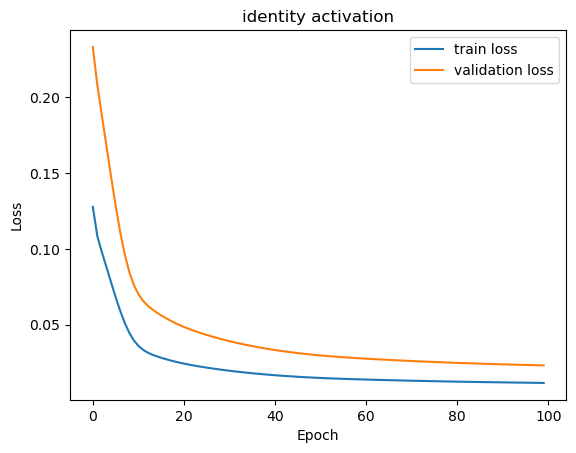

In [20]:
plot_losses(identity_train_loss, identity_val_loss, 'identity')

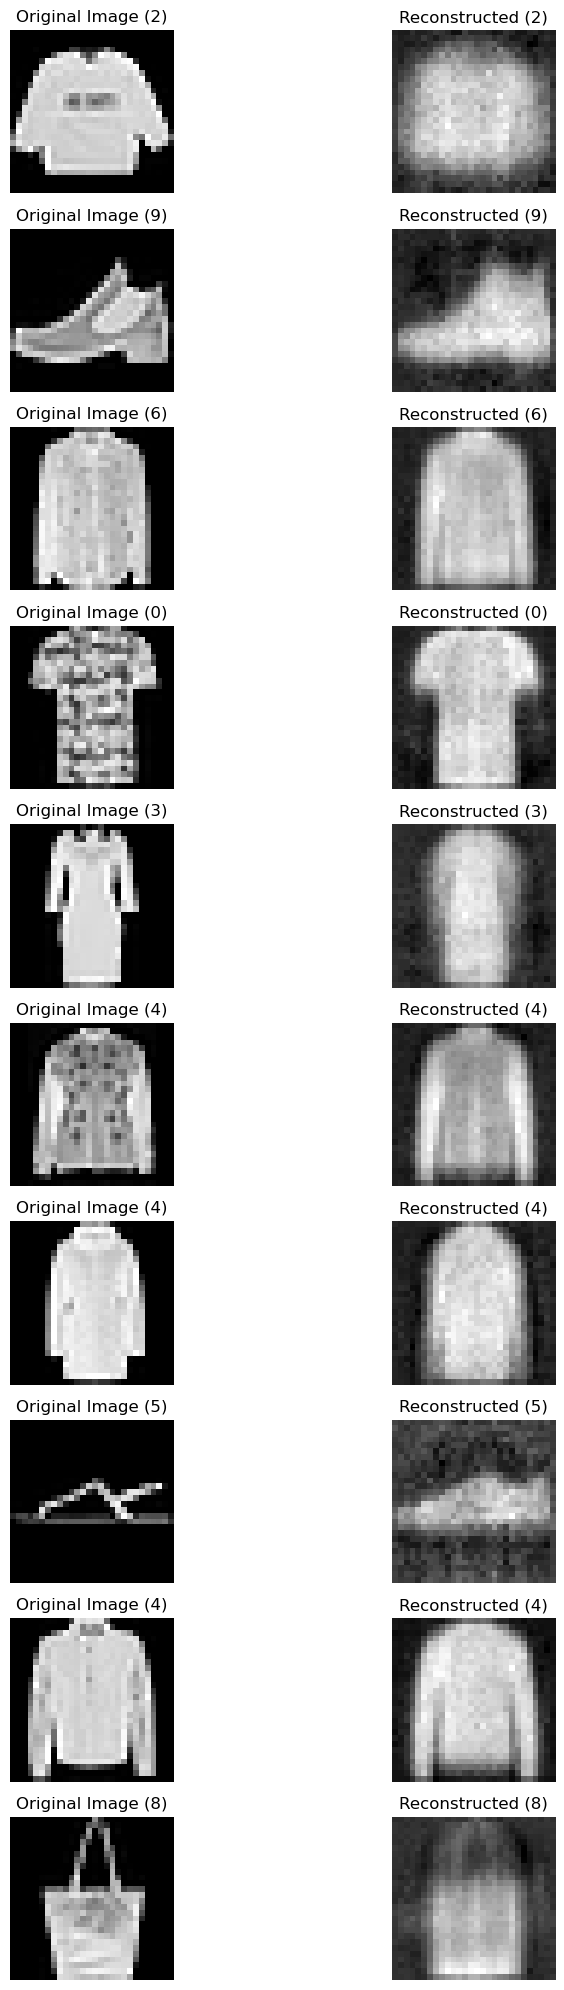

In [21]:
visualize(identity_mlp)

Since there is loss in training and validation for both the activation layer, the model does not achieve 100% accuracy rate and hence, during regeneration, we notice some blur and distortion in the regenerated image as compared to the original image.

##### 5. Lastly, from the two neural networks trained above extract the feature vector of size ‘a’ for the train and test data samples. Using this vector as your new set of image features, train two new smaller MLP Classifiers with 2 layers, each of size ‘a’ on the training dataset and report accuracy metrics for both these classifiers. Train it for 200 iterations with the same solver and learning rate as part 2. Contrast this with the MLP Classifier you trained in part 2 and report possible reasons why this method still gives you a decent classifier?

In [33]:
def activate(activation):
    if activation == 'relu':
        return lambda x : np.maximum(0, x)
    elif activation == 'identity':
        return lambda x : x

In [ ]:
def get_feature_vector(mlp, X, activation):
    layer1_output = activation(np.dot(X, mlp.coefs_[0]) + mlp.intercepts_[0])
    layer2_output = activation(np.dot(layer1_output, mlp.coefs_[1]) + mlp.intercepts_[1])
    middle_layer_output = activation(np.dot(layer2_output, mlp.coefs_[2]) + mlp.intercepts_[2])
    return middle_layer_output

In [49]:
batch_size = 128
lr_rate = 2e-5

def train_new_classifier(a, activation_layer, X_train):
    mlp = MLPClassifier(hidden_layer_sizes=(a,a), 
                        max_iter=1,
                        solver='adam', 
                        batch_size=batch_size, 
                        learning_rate_init=lr_rate, 
                        activation=activation_layer, 
                        warm_start=True,
                        random_state=42)    
    
    for epoch in range(200):
        mlp.fit(X_train, y_train)
    print(f"Completed training with {activation_layer} activation.")
    return mlp

In [52]:
layer_a = get_feature_vector(relu_mlp, X_train, activate('relu'))

(7200, 32)


In [53]:
a = layer_a.shape[1]
mlp_relu = train_new_classifier(a, 'relu', layer_a)

Completed training with relu activation.


In [54]:
test_a = get_feature_vector(relu_mlp, X_test, activate('relu'))

(2000, 32)


In [57]:
y_pred1 = mlp_relu.predict(test_a)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy of first MLP Classifier: {accuracy1 * 100:.2f} %")

Accuracy of first MLP Classifier: 69.15 %


In [58]:
layer_a = get_feature_vector(relu_mlp, X_train, activate('identity'))

(7200, 32)


In [59]:
a = layer_a.shape[1]
mlp_relu = train_new_classifier(a, 'identity', layer_a)

Completed training with identity activation.


In [60]:
test_a = get_feature_vector(relu_mlp, X_test, activate('identity'))

(2000, 32)


In [61]:
y_pred1 = mlp_relu.predict(test_a)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy of first MLP Classifier: {accuracy1 * 100:.2f} %")

Accuracy of first MLP Classifier: 73.20 %


We are extracting the feature vector from an already trained model. This extracted feature is a representation of the image in low dimensions, which captures less but relevant information as compared to raw pixels. We use this extracted feature to train a new model with (a,a) layers. It gives a decent performance because it has already captured a decent amount of information from input data, helping the model to classify the images. Hence, the new model gives decent performance as compared to the model from part 2.